In [3]:
# importing the dependencies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# loading the dataset into Pandas DataFrame
wine_data=pd.read_excel('winequality-red.xlsx')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#Getting the dataset information to ensure that the dataset is clean
wine_data.info()

#Ok The dataset is clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Data Analysis and Visualization

#Statistical measures of the data set
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


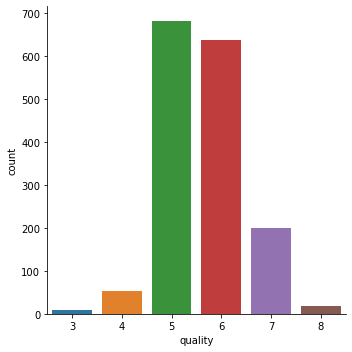

In [7]:
#number of data for each quality
sns.catplot(x='quality' , data = wine_data , kind = 'count')
# The number of values are greater in 5 , 6 
#for example 600 inputs have quality 6 of 10

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

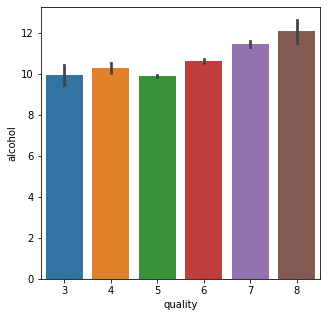

In [8]:
#alcohol vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y='alcohol' ,data = wine_data)

#this mean that if the citric acid is low then the you will get a high quality 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

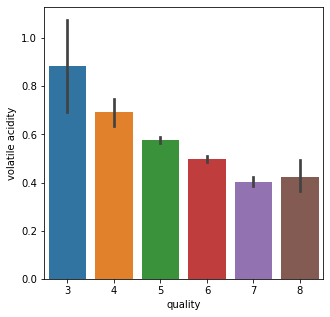

In [9]:
#volatile acidity vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y='volatile acidity' ,data = wine_data)

#this is mean that if the volatile acidity is high then the you will get a low quality 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

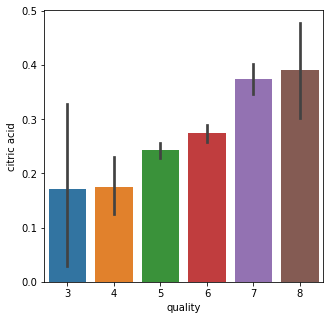

In [10]:
#citric acid vs quality
plot =plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y='citric acid' ,data = wine_data)

#this is mean that if the citric acid is low then the you will get a high quality 

In [11]:
#Correlation
# 1-Positive Correlation
# 1-Negative Correlation

correlation = wine_data.corr()
correlation


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

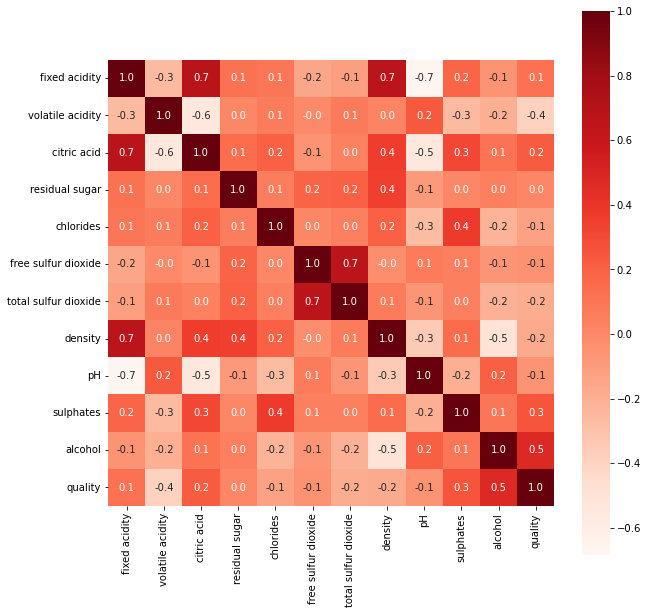

In [12]:
#constructing a heatmap to undrestand the correlation between the columns
plt.figure(figsize =(10,10))
sns.heatmap(correlation, cbar=True , square=True , fmt = '.1f',annot=True, annot_kws={'size':10} , cmap='Reds')

#cbar = The color of the bar
#square = the shape of the figure 
# fmt = to display the numbers in float type 
#annot = the values => fixed acidity
#annot_kws = the size of the font inside the squares 
#cmap = the color of the heatmap
# this heatmap for data analysis visulaization to show wich column is positivlly corrleation and negativlly corrleation

In [13]:
#data Preprcossing
#we need to separeate the data and lable  from the quality column 
x = wine_data.drop('quality', axis=1)

#axis value = 1 if you dropping a column
#axis value = 0 if you dropping multiple row 
# x = dataset without the quality column

In [14]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
#lable Binarization
#Means that instade of display the 6 values of the quality 
#We will display it as 0 or 1
Y = wine_data['quality'].apply(lambda QB_value: 1 if QB_value>=7 else 0)
# Y = quality column

In [16]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [17]:
# Now time to split the data
# Training and Testing data 
# to train our machen learing model with the Training data
# and then test the model with the Test data 
X_train ,X_test,Y_train, Y_test= train_test_split(x,Y , test_size = 0.2 , random_state = 2 )
# X_ytr

In [18]:
x.shape

(1599, 11)

In [19]:
X_train.shape

(1279, 11)

In [20]:
X_test.shape

(320, 11)

In [21]:
model = RandomForestClassifier()

In [22]:
model.fit(X_train , Y_train)

RandomForestClassifier()

In [23]:
#accuracy of the algorthim
model.score(X_test , Y_test)

0.91875

In [24]:
input_data=(7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10)

In [25]:
input_data_as_array=np.asarray(input_data)

In [26]:
input_data_reshape=input_data_as_array.reshape(1,-1)

In [27]:
input_data_reshape

array([[ 7.3   ,  0.65  ,  0.    ,  1.2   ,  0.065 , 15.    , 21.    ,
         0.9946,  3.39  ,  0.47  , 10.    ]])

In [29]:
model.predict(input_data_reshape)[0]

1